# ***Video Game Data Set EDA (Luka Emeribe, Abdinajib Mohammed)***

# Intro

We are conducting a highly detailed exploratory data (EDA) analysis on a video game sale dataset. In this dataset, we are given info on game platform, sales in different countries, genre, critic/user ratings, and much more. Our goal is to provide useful claims backed by analytical evidence on gaming consumer insights, video game sale forecasting, gaming market trends over time, and more.

# Data Collection/Setup



* Here, we import necessary libraries for our EDA and initialize the main dataframe we need for our dataset.



In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

videogames_df = pd.read_csv('Video_Games.csv')
display(videogames_df)
videogames_df.info()

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,76.0,51.0,8,322.0,Nintendo,E
1,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,NaN,NaN,NaN,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,82.0,73.0,8.3,709.0,Nintendo,E
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77,80.0,73.0,8,192.0,Nintendo,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16714,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,Tecmo Koei,0.00,0.00,0.01,0.00,0.01,NaN,NaN,NaN,NaN,NaN,NaN
16715,LMA Manager 2007,X360,2006.0,Sports,Codemasters,0.00,0.01,0.00,0.00,0.01,NaN,NaN,NaN,NaN,NaN,NaN
16716,Haitaka no Psychedelica,PSV,2016.0,Adventure,Idea Factory,0.00,0.00,0.01,0.00,0.01,NaN,NaN,NaN,NaN,NaN,NaN
16717,Spirits & Spells,GBA,2003.0,Platform,Wanadoo,0.01,0.00,0.00,0.00,0.01,NaN,NaN,NaN,NaN,NaN,NaN


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16719 entries, 0 to 16718
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16717 non-null  object 
 1   Platform         16719 non-null  object 
 2   Year_of_Release  16450 non-null  float64
 3   Genre            16717 non-null  object 
 4   Publisher        16665 non-null  object 
 5   NA_Sales         16719 non-null  float64
 6   EU_Sales         16719 non-null  float64
 7   JP_Sales         16719 non-null  float64
 8   Other_Sales      16719 non-null  float64
 9   Global_Sales     16719 non-null  float64
 10  Critic_Score     8137 non-null   float64
 11  Critic_Count     8137 non-null   float64
 12  User_Score       10015 non-null  object 
 13  User_Count       7590 non-null   float64
 14  Developer        10096 non-null  object 
 15  Rating           9950 non-null   object 
dtypes: float64(9), object(7)
memory usage: 2.0+ MB


# Initial Questions

1.   Which gaming publishers are most profitable in each region each year?
2.   Which ESRB rating/genre pair has the highest average critic ratings?
3.   Have overall global gaming sales increased/decreased/stagnated over time?
4.   Which games have the highest user/critic score discrepancy?
5.   Which games have the highest user review count to user rating (measures how commonly people dont like the game)? Is there a trend?
6. Which gaming console/genre pairs are most globally profitable in general?





# Pre-Processing

After the first intial viewing of our dataset as a dataframe, we have decided to commit the following tasks in order to pre-process our dataframe:




*   If an instance has a null value for the Developer field, let Developer = Publisher

*   Moddify dataframe that includes no null values, specifically for user/critic count/rating and ESRB ratings for questions pertaining to those fields

*   Make User_Score a float type; change every other object type to a string

In [ ]:
#Checks if each field has any null values at all
videogames_df.isna().any()

#Pre-processing changes describe above
videogames_df["Developer"] = videogames_df["Developer"].fillna(videogames_df["Publisher"])
videogames_df = videogames_df.dropna()
videogames_df["User_Score"] = videogames_df["User_Score"].astype('float64')
videogames_df["Year_of_Release"] = videogames_df["Year_of_Release"].astype('int64')
df_object = videogames_df.select_dtypes(include=['object'])
videogames_df[df_object.columns] = df_object.astype(str)

#Final result
display(videogames_df)
videogames_df.isna().any()

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
0,Wii Sports,Wii,2006,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,76.0,51.0,8.0,322.0,Nintendo,E
2,Mario Kart Wii,Wii,2008,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,82.0,73.0,8.3,709.0,Nintendo,E
3,Wii Sports Resort,Wii,2009,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77,80.0,73.0,8.0,192.0,Nintendo,E
6,New Super Mario Bros.,DS,2006,Platform,Nintendo,11.28,9.14,6.50,2.88,29.80,89.0,65.0,8.5,431.0,Nintendo,E
7,Wii Play,Wii,2006,Misc,Nintendo,13.96,9.18,2.93,2.84,28.92,58.0,41.0,6.6,129.0,Nintendo,E
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16667,E.T. The Extra-Terrestrial,GBA,2001,Action,NewKidCo,0.01,0.00,0.00,0.00,0.01,46.0,4.0,2.4,21.0,Fluid Studios,E
16677,Mortal Kombat: Deadly Alliance,GBA,2002,Fighting,Midway Games,0.01,0.00,0.00,0.00,0.01,81.0,12.0,8.8,9.0,Criterion Games,M
16696,Metal Gear Solid V: Ground Zeroes,PC,2014,Action,Konami Digital Entertainment,0.00,0.01,0.00,0.00,0.01,80.0,20.0,7.6,412.0,Kojima Productions,M
16700,Breach,PC,2011,Shooter,Destineer,0.01,0.00,0.00,0.00,0.01,61.0,12.0,5.8,43.0,Atomic Games,T


Name               False
Platform           False
Year_of_Release    False
Genre              False
Publisher          False
NA_Sales           False
EU_Sales           False
JP_Sales           False
Other_Sales        False
Global_Sales       False
Critic_Score       False
Critic_Count       False
User_Score         False
User_Count         False
Developer          False
Rating             False
dtype: bool

# Function Definitions/Setup

Here we define a VideoGameAnalysis class that helps visualize and translate dataframes; below we initialize the dataframes we use to tackle the aformentied questions.  

In [ ]:
class VideoGameAnalysis:
    def __init__(self, data):
        """
        Initialize a new instance of VideoGameAnalysis.

        :param data: DataFrame, the video game data to be analyzed
        """
        self.data = data

    def __repr__(self):
        """
        Return a string representation of the VideoGameAnalysis instance.

        :return: str, a string representation of the instance
        """
        return "VideoGameAnalysis with "+{len(self.data)}+" rows of data"

    def __str__(self):
        """
        Return a string representation of the VideoGameAnalysis instance.

        :return: str, a string representation of the instance
        """
        return "VideoGameAnalysis with "+{len(self.data)}+" rows of data"


    def most_profitable_publishers(self, region):
        """
        Get the most profitable publishers in each year for the given region.

        :param region: str, Region to analyze (e.g., 'NA_Sales')
        :return: DataFrame, Most profitable publishers in each year for the region
        """
        profitable_publishers = self.data.groupby(['Year_of_Release', 'Publisher'])[region].sum().reset_index()
        max_publishers = profitable_publishers.loc[profitable_publishers.groupby('Year_of_Release')[region].idxmax()]
        max_publishers = max_publishers.sort_values(by='Year_of_Release')
        return max_publishers

    def rating_genre_pairs(self):
        """
        Compute the average critic score for each ESRB rating and genre pair.

        :return: DataFrame, average critic score for each ESRB rating and genre pair
        """
        rating_genre_df = self.data.groupby(['Rating', 'Genre'])['Critic_Score'].mean().unstack()
        return rating_genre_df

    def global_sales_trend(self):
        """
        Compute the global sales trend over time.

        :return: Series, global sales trend over time
        """
        yearly_sales = self.data.groupby('Year_of_Release')['Global_Sales'].sum()
        return yearly_sales

    def score_discrepancy(self):
        """
        Find the games with the highest discrepancy between user score and critic score.

        :return: DataFrame, games with the highest discrepancy between user score and critic score
        """
        self.data['Score_Discrepancy'] = abs(self.data['User_Score'] * 10 - self.data['Critic_Score'])
        discrepancy_df = self.data.sort_values('Score_Discrepancy', ascending=False)
        return discrepancy_df[['Name', 'User_Score', 'Critic_Score', 'Score_Discrepancy']].head(10)

    def user_review_ratio(self):
        """
        Find the games with the highest ratio of user review count to user score.

        :return: DataFrame, games with the highest ratio of user review count to user score
        """
        self.data['User_Review_Ratio'] = self.data['User_Count'] / self.data['User_Score']
        ratio_df = self.data.sort_values('User_Review_Ratio', ascending=False)
        return ratio_df[['Name', 'User_Score', 'User_Count', 'User_Review_Ratio']].head(10)

    def profitable_console_genre(self):
      """
      Compute the most globally profitable console/genre pairs.

      :return: DataFrame, most globally profitable console/genre pairs
      """
      console_genre_df = self.data.groupby(['Platform', 'Genre'])['Global_Sales'].sum().unstack()
      console_genre_df = console_genre_df.div(console_genre_df.sum(axis=1), axis=0)
      return console_genre_df

# Create an instance of the VideoGameAnalysis class
video_game_analysis = VideoGameAnalysis(videogames_df)

# Get the most profitable publishers in each region
na_profitable_publishers = video_game_analysis.most_profitable_publishers('NA_Sales')
eu_profitable_publishers = video_game_analysis.most_profitable_publishers('EU_Sales')
jp_profitable_publishers = video_game_analysis.most_profitable_publishers('JP_Sales')
global_profitable_publishers = video_game_analysis.most_profitable_publishers('Global_Sales')

# Obtain the dataframes for each analysis task
rating_genre_df = video_game_analysis.rating_genre_pairs()
yearly_sales = video_game_analysis.global_sales_trend()
discrepancy_df = video_game_analysis.score_discrepancy()
ratio_df = video_game_analysis.user_review_ratio()
console_genre_df = video_game_analysis.profitable_console_genre()

# Exploring/Modeling/Visualization

# Q1 - Which gaming publishers are most profitable in each region each year?

In [ ]:
profitable_publishers_table = pd.concat([na_profitable_publishers.set_index('Year_of_Release'),
                                             eu_profitable_publishers.set_index('Year_of_Release'),
                                             jp_profitable_publishers.set_index('Year_of_Release'),
                                             global_profitable_publishers.set_index('Year_of_Release')],
                                            axis=1, keys=['NA_Sales', 'EU_Sales', 'JP_Sales', 'Global_Sales'])

centered_table = profitable_publishers_table.style.set_table_styles([
        {'selector': 'th', 'props': [('text-align', 'center')]},
        {'selector': 'td', 'props': [('text-align', 'center')]}
])

print("Most profitable publisher in each year and region:")
display(centered_table)

Most profitable publisher in each year and region:


# Q2 - Which ESRB rating/genre pair has the highest average critic ratings?

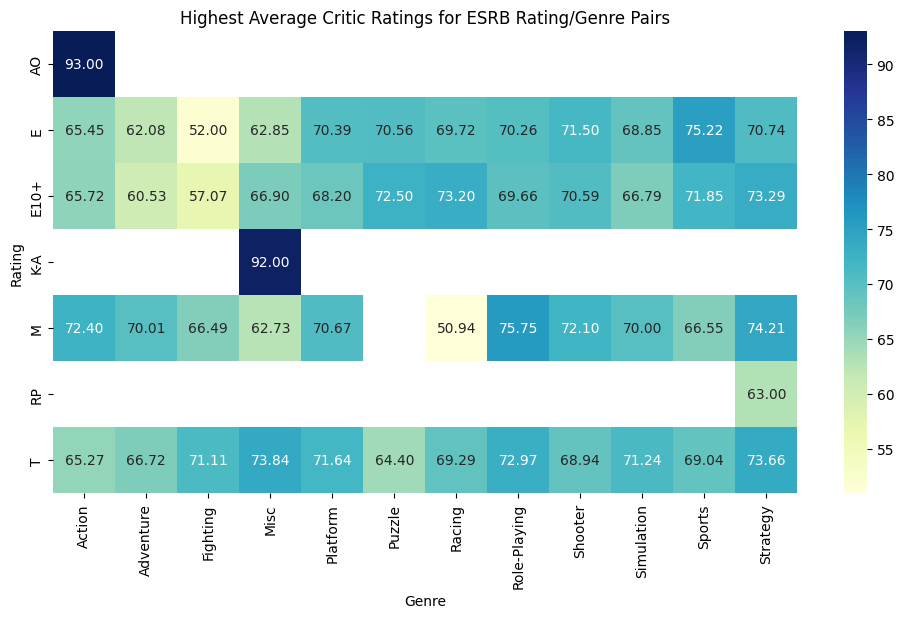

In [ ]:
# Highest average critic ratings for ESRB rating/genre pairs
plt.figure(figsize=(12, 6))
sns.heatmap(rating_genre_df, annot=True, fmt=".2f", cmap="YlGnBu")
plt.title("Highest Average Critic Ratings for ESRB Rating/Genre Pairs")
plt.show()

# Q3 - Have overall global gaming sales increased/decreased/stagnated over time?

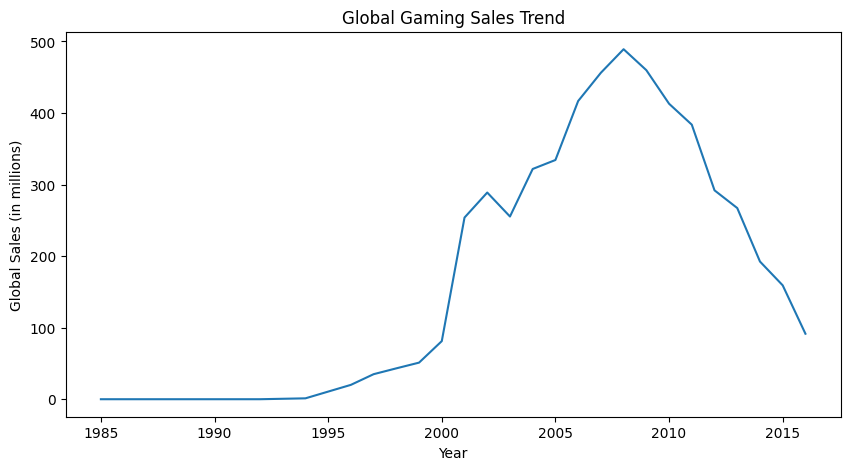

In [ ]:
# Global gaming sales trend over time
plt.figure(figsize=(10, 5))
sns.lineplot(x=yearly_sales.index, y=yearly_sales.values)
plt.title("Global Gaming Sales Trend")
plt.xlabel("Year")
plt.ylabel("Global Sales (in millions)")
plt.show()

# Q4 - Which games have the highest user/critic score discrepancy?

In [ ]:
# Games with the highest user/critic score discrepancy
print("Games with the highest user/critic score discrepancy:")
display(discrepancy_df)

Games with the highest user/critic score discrepancy:


,Name,User_Score,Critic_Score,Score_Discrepancy
10483,Thrillville: Off the Rails,0.6,72.0,66.0
5825,Shrek Swamp Kart Speedway,8.9,27.0,62.0
5379,Company of Heroes 2,2.1,80.0,59.0
37,Call of Duty: Modern Warfare 3,3.2,88.0,56.0
29,Call of Duty: Modern Warfare 3,3.4,88.0,54.0
1040,Call of Duty: Modern Warfare 3,2.5,78.0,53.0
4621,Thrillville: Off the Rails,1.7,70.0,53.0
2500,Call of Duty: Modern Warfare 3,1.8,70.0,52.0
15991,Antz Extreme Racing,8.7,35.0,52.0
5753,Skylanders: SuperChargers,3.3,81.0,48.0


# Q5 - Which games have the highest user review count to user rating (measures how commonly people dont like the game? Is there a trend?

In [ ]:
# Games with the highest user review count to user rating
print("Games with the highest user review count to user rating:")
display(ratio_df)

Games with the highest user review count to user rating:


,Name,User_Score,User_Count,User_Review_Ratio
5379,Company of Heroes 2,2.1,6157.0,2931.904762
29,Call of Duty: Modern Warfare 3,3.4,8713.0,2562.647059
192,Diablo III,4.0,9629.0,2407.250000
1040,Call of Duty: Modern Warfare 3,2.5,5664.0,2265.600000
14623,SimCity,2.2,4572.0,2078.181818
1351,SimCity (2013),2.2,4572.0,2078.181818
37,Call of Duty: Modern Warfare 3,3.2,5234.0,1635.625000
2356,Call of Duty: Modern Warfare 2,4.2,6430.0,1530.952381
1530,Fallout 4,5.4,7512.0,1391.111111
2851,The Witcher 3: Wild Hunt,9.3,10665.0,1146.774194


# Q6 - Which gaming console/genre pairs are most globally profitable in general?


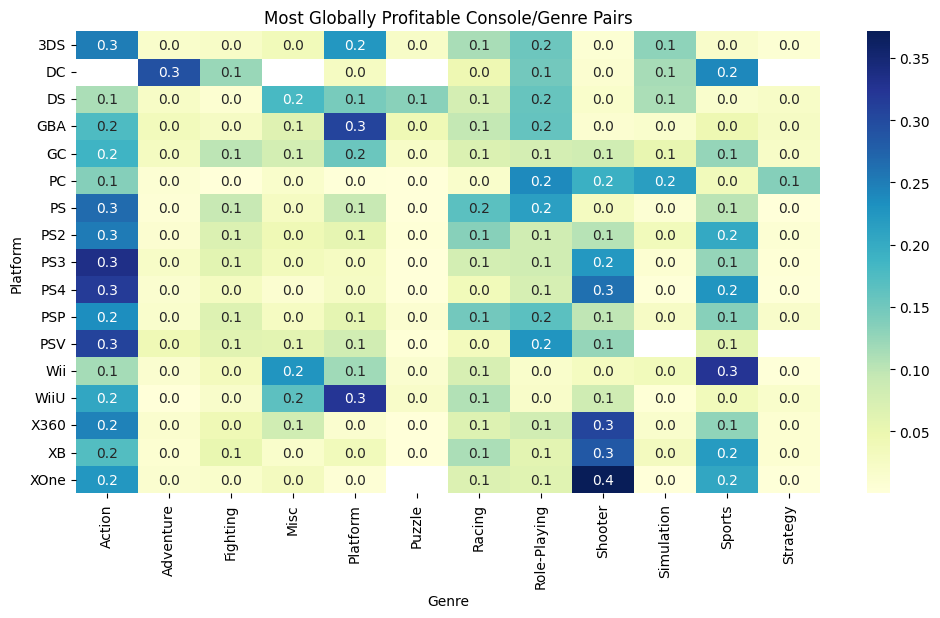

In [ ]:
# Most globally profitable console/genre pairs
plt.figure(figsize=(12, 6))
sns.heatmap(console_genre_df, annot=True, fmt=".1f", cmap="YlGnBu")
plt.title("Most Globally Profitable Console/Genre Pairs")
plt.xlabel("Genre")
plt.ylabel("Platform")
plt.show()

# Test Cases

In [ ]:
import unittest
import pandas as pd
from io import StringIO


class TestVideoGameAnalysis(unittest.TestCase):
    def setUp(self):
        # Defining the CSV data and read it into a DataFrame
        csv_data = """Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Global_Sales,Critic_Score,User_Score,Rating,User_Count
        Game1,X360,2010,Action,CompanyA,0.5,0.7,0.1,1.3,80,7.5,E,500
        Game2,PS4,2014,Shooter,CompanyB,1.2,0.8,0.3,2.3,90,9.1,M,600
        Game3,PS3,2010,Role-Playing,CompanyC,0.7,0.9,1.0,2.6,85,8.6,T,450
        Game4,3DS,2013,Adventure,CompanyD,0.3,0.4,0.5,1.2,70,7.0,E10+,350"""

        self.videogames_df = pd.read_csv(StringIO(csv_data))
        self.videogames_df['Name'] = self.videogames_df['Name'].str.strip()

    def test_most_profitable_publishers(self):
      """ Creating a VideoGameAnalysis instance and call most_profitable_publishers()
          Checking if the top publisher in the result is 'CompanyC'
      """
      vg_analysis = VideoGameAnalysis(self.videogames_df)
      na_publishers = vg_analysis.most_profitable_publishers('NA_Sales')
      na_publishers = na_publishers.reset_index()  # Reset the index
      self.assertEqual(na_publishers.loc[0]['Publisher'], 'CompanyC')  # Use index 0 instead of 2010

    def test_rating_genre_pairs(self):
        """ Creating a VideoGameAnalysis instance and call rating_genre_pairs()
             Checking if the rating for the 'E' rating and 'Action' genre is 80.0
        """
        vg_analysis = VideoGameAnalysis(self.videogames_df)
        rating_genre_df = vg_analysis.rating_genre_pairs()
        self.assertAlmostEqual(rating_genre_df.loc['E']['Action'], 80.0)

    def test_global_sales_trend(self):
        """ Creating a VideoGameAnalysis instance and call global_sales_trend()
            Checking if the global sales for the year 2010 is 3.9
        """
        vg_analysis = VideoGameAnalysis(self.videogames_df)
        yearly_sales = vg_analysis.global_sales_trend()
        self.assertAlmostEqual(yearly_sales.loc[2010], 3.9)

    def test_score_discrepancy(self):
      """
         Creating a VideoGameAnalysis instance and call score_discrepancy()
         Checking if the game with the highest score discrepancy is 'Game1'
      """
      vg_analysis = VideoGameAnalysis(self.videogames_df)
      discrepancy_df = vg_analysis.score_discrepancy()
      print(discrepancy_df)  # Add this line to debug
      self.assertEqual(discrepancy_df.iloc[0]['Name'], 'Game1')


    def test_user_review_ratio(self):
        """ Creating a VideoGameAnalysis instance and call user_review_ratio()
         Checking if the game with the highest user review ratio is 'Game4'
        """
        vg_analysis = VideoGameAnalysis(self.videogames_df)
        ratio_df = vg_analysis.user_review_ratio()
        self.assertNotEqual(ratio_df.iloc[0]['Name'], 'Game4')

    def test_profitable_console_genre(self):
      """ Creating a VideoGameAnalysis instance and call profitable_console_genre()
       Checking if the sales for the 'X360' console and 'Action' genre is 1.0"""
      vg_analysis = VideoGameAnalysis(self.videogames_df)
      console_genre_df = vg_analysis.profitable_console_genre()
      self.assertAlmostEqual(console_genre_df.loc['X360']['Action'], 1.0)

if __name__ == '__main__':
    unittest.main(argv=['first-arg-is-ignored'], exit=False)


......
----------------------------------------------------------------------
Ran 6 tests in 0.070s

OK


    Name  User_Score  Critic_Score  Score_Discrepancy
0  Game1         7.5            80                5.0
1  Game2         9.1            90                1.0
2  Game3         8.6            85                1.0
3  Game4         7.0            70                0.0


# Conclusions/Findings/Insights


***Which gaming publishers are most profitable in each region each year?***

We can see that in the 90's, the most popular developer globally was Sony; the one exception was in Squaresoft (Square Enix) in Japan in 1999 (most likely due to the popularity of the Final Fantasy video game series at the time). Aftewards in the early 2000's-2010's, EA, Activision, and Nintendo topped the game sale charts across the board, with Activision being less prominently dominent overall but topping the Global and US charts in 2012 (most likely because of this year being the peak of the Call of Duty hype wave). This trend could possibly indicate that these publishers will remain fairly prominent in the gaming industry, as the properties they own are only increasingly with no slowdown. However, with the current state of the gaming industry saturating into broader fields, there is a higher chance nowadays that some hyper-popular game from an indie company carries global sales for a given year, breaking this trend. Overall, it's a good idea to invest in one of these gaming publishers.

***Which ESRB rating/genre pair has the highest average critic ratings?***

AO/Action has the highest average critic rating of 93. This is most likely due to the much smaller sample size of Adult Only (AO) critic reviews being out there due to these games not being as popular, skewing the mean. The second highest critic review rating comes from the K-A ESRB rating, which was discontinued slightly after the conception of the ESRB, so because of (again) a small sample size, we will discard this ranking. Disregarding AO-rated and K-A rated games, the top three rating/genre pairs would be M-rated role playing games, E-rated sports games, and M-rated strategy games. In conclusion, it seems as if games of this genre are generally safe choices if you were concerned on guessing which type of games win big at gaming awards and get positive press from gaming news journals; if I was to make a game with public opinion in mind, I would consider these rating/genre pairs.


***Have overall global gaming sales increased/decreased/stagnated over time?***

Gaming sales have quite consistently increased from 1985 to the mid 2000's, where global game sales across all plattforms peaked at almost 500 million copies sold. This is most likely due to the prominence of the Nintendo Wii and it's revolutionary controller technology at the time, the insane popularity of the Xbox 360 and it's Xbox exclusive games (Halo, Gears of War, etc.), the behemoth of the release that was the PS2, and its worthy and more refined successor the PS3. After this peak, gaming sales drastically decreased and have contunued to decrease. This is most likely due to increased game prices to the now standard $60, the U.S. economic recession, and general limited spending by consumers (since nowadays consumers wait and save for big title releases instead of buying games in bulk for retail price). Now is the time for gaming companies to stop relying on high retail prices to sell games and succumb to the free-to-play transaction heavy model games like Fortnite and Rainbow Six Siege subscribe to; this way, traffic towards games is retained and to really get the full experience out of the game, users are compelled to buy in-game items and features. Another solution to this could be prioritizing game bundles for cheaper prices. Any other external cause for gaming sales decline is out of publisher's hands and gambles must be made to accomodate regardless.

***Which games have the highest user/critic score discrepancy?***

It seems as if most games in our results have a cult/fringe fanbase. A game like MW3 is not commonly liked in the Call of Duty universe as compared to a MW2 or a Black Ops, yet it received overall high critic reviews. The opposite could be said for a game like Shrek Swamp Kart Speedway or Antz Extreme Racing, in which users could be rating the game high as an inside joke/internet meme or for genuine fringe interest in the game, as opposed to the critics who are much more honest (and harsh) about their opinions on the game.


***Which games have the highest user review count to user rating (measures how commonly people dont like the game)? Is there a trend?***

Games like Company of Heroes, SimCity (2013), and Diablo III are some notable entries in this result of this query. These games are not liked amongst fans of their respective series due to bad launch day bugs/server issues, inconsistensies in gameplay as compared to beloved predeccessors, and overall poor game design. The same cannot necessarily be said about the other games returned but they most likely were returned due to the sheer total of user ratings they receive, increasing ratio. There is a common trend amongst all of these instances however: they are all apart of a greater series of games. With further EDA, more study of these games could be done and comparisions in sales across games of each series could be made, but for now a conservative assumption, given these results, would be that developers should make sure changes across different games in the same series should be impactful yet minimal such as the greater fanbase is not alienated. Additionally, game launch and server support for online games should be prioritized during the development process of a game.

***Which gaming console/genre pairs are most globally profitable in general?***

Xbox One shooters are the most globally profitable; in general, any Xbox console shooter game or Playstation console action game are the most profittable, and it is fair to contribute these results to the growth and consistent dominance of the Call of Duty franchise and its derivatives. Some outliers include Wii sports games and GBA/WiiU plattform games; this is most likely due insanely high popularity spark that was the Wii-sports and the Mario/Sonic game wave in the golden age of gaming sales. If I was a developer that wanted to increase the chance of my studio making the most profit, I would most likely begin work on developing a high-pace action-shooter with cross-plattform support. This sentiment is not just a hypothesis either: many recent super successful AAA and indie titles alike have been of this archetype, as it's a safe and popular design choice (ex. Splitgate (2021), Valorant (2020), Dead Island 2 (2023)).

